# Лабораторная работа 1

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий, а также подкреплённый грамотной визуализацией. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета, кода и графиков. 

## Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают свою карму
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому, чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

## Данные

В данной лабораторной работе вы будете работать с данными из Dota2. 

Скачать датасет и подробно ознакомится с его описанием вы можете на странице первого конкурсного [соревнования](https://www.kaggle.com/t/8ddaf99c566b4d088b3e352ce1bbbc19).

## Маштабирование признаков

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [sklearn.preprocessing.MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.base import RegressorMixin, ClassifierMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, log_loss, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import SGDRegressor, SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

## Линейная регрессия и SGD

В данном блоке вам предстоит предсказать суммарное количество золота для команды `radiant` 

(игроки: `player_0`, `player_1`, `player_2`, `player_3`, `player_4`) на 600 секунде матча.

In [4]:
X = pd.read_csv('../Kaggle/competition-1-sem-1-yandex-shad-fall-2021/gold.csv', index_col=[0, 1])

radiant_team = ['player_0', 'player_1', 'player_2', 'player_3', 'player_4']
dire_team = ['player_5', 'player_6', 'player_7', 'player_8', 'player_9']

Y = X.loc[pd.IndexSlice[:, 600], radiant_team].sum(axis=1).droplevel('times')
X = X.unstack().drop([(player, 600) for player in radiant_team], axis=1)

X.columns = ['{}_{}'.format(*column) for column in X.columns]

Для оценки качества предсказания будем использовать [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). 

**Задание 1** (3 балла)

Реализуйте класс `CustomSGDRegressor`, который бы обучал многомерную линейную регрессию минимизируя сумму квадратов ошибки, используя `SGD`.

Класс, должен принимать следующие параметры при инициализации:
    
    learning_rate : float : параметр задающий скорось обучения
    fit_intercept : bool : если True, то добавляем свободный член
    max_iter : int : максимальное число эпох
    shuffle : bool : если True, то перемещиваем данные обучения перед каждой эпохой
    
и иметь методы `fit` и `predict`.

После обучения (запуска метода `fit`) мы должны мочь обратиться к атрибутам класса: 
    
    coef_  : ndarray of shape (n_features,)
    intercept_ : ndarray of shape (1,)

In [8]:
class CustomSGDRegressor(RegressorMixin):
    def __init__(self, 
                 learning_rate = 0.01,
                 fit_intercept = True, 
                 max_iter = 100, 
                 shuffle = False, 
                 batch_size = 1, 
                 verbose=False,
                 random_state=42):
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.verbose = verbose
        self.random_state = random_state
        
    @staticmethod
    def _add_intercept(X):
        I = np.ones(len(X))[:, np.newaxis]
        X = np.hstack([I, X])
        return X
    
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        self.W = np.random.rand(X.shape[1])
        Y = Y[:, np.newaxis]
        
        mses = []
        epoch = 1
        
        np.random.seed(self.random_state)
        
        while epoch <= self.max_iter:
            dataset = np.hstack([X, Y])
            if self.shuffle:
                shuffle(dataset)
                
            X_epoch = dataset[:, :-1]
            Y_epoch = dataset[:, -1:]
            
            batch_ids = np.random.randint(low=0, high=X.shape[0], size=self.batch_size)
            X_batch = X_epoch[batch_ids]
            Y_batch = Y_epoch[batch_ids]
            
            Y_batch_pred = X_batch @ self.W[:, np.newaxis]
            self.W += self.learning_rate * ((Y_batch - Y_batch_pred) * X_batch).sum(axis=0)
            
            mse = mean_squared_error(Y_batch, Y_batch_pred)
            mses.append(mse)

            if (epoch % int(self.verbose) == 0):
                print(f'epoch: {epoch}, MSE: {mse}')
                
            epoch += 1
        
        self.losses_ = mses
        self.coef_ = self.W[1:]
        self.intercept_ = self.W[0]
    
    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return X @ self.W[:, np.newaxis]

Разбейте `X` и `Y` на `train` и `test`, используя [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Далее вам нужно подобрать такой `learning_rate`, на котором достигается минимум среднеквадратичная ошибка, 

а также принять решение о необходимости масштабирования признаков.

Постройте соответствующие кривые обучения и сделайте выводы.

---

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [28]:
%%time
sgd_reg = CustomSGDRegressor(learning_rate=1e-3,
                             fit_intercept=True, 
                             max_iter=1000, 
                             shuffle=True, 
                             batch_size=1, 
                             verbose=100)
sgd_reg.fit(X_train, y_train)

epoch: 100, MSE: 159211466.9956345
epoch: 200, MSE: 193771028.59582618
epoch: 300, MSE: 25856404.310871124
epoch: 400, MSE: 729946.277262415
epoch: 500, MSE: 21837200.659665257
epoch: 600, MSE: 11314798.003907613
epoch: 700, MSE: 16147539.322991636
epoch: 800, MSE: 13172034.495385092
epoch: 900, MSE: 178568.99978825293
epoch: 1000, MSE: 44400.7577848736
CPU times: user 13.9 s, sys: 5.46 s, total: 19.4 s
Wall time: 19.4 s


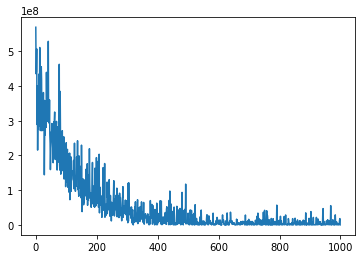

In [29]:
plt.plot(sgd_reg.losses_)

In [30]:
y_pred = sgd_reg.predict(X_test)
print("MSE on test sample:", mean_squared_error(y_test, y_pred))

MSE on test sample: 4863875.37639015


---

__Выводы:__

* Масштабирование MinMax, значения признаков в интервале от 0 до 1, без масштабирования MSE может переполниться до np.inf
* MSE сходится стохастически, часть итераций увеличивают MSE, часть уменьшают, но в целом MSE падает
* С некоторой эпохи MSE начинает стагнировать, можно понижать шаг обучения в нужный момент на некоторую величину для продолжения эффективного спуска, например, так
    * if (epoch % int(self.max_iter/3) == 0): 
        * self.learning_rate /= 2

---

Обучите [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) выставив его параметры при инициализации так, что бы он максимально был близок к реализованной вами модели.

Сравните вашу реализацию и реализацию из sklearn: 
    
    1. Достигают ли они сравнимого качества на данном наборе данных?
    2. Одинаковая ли у них скорость сходимости? 
    3. Одинаковая ли скорость обучения при заданном количестве эпох?
    4. Похожие ли веса модели были найдены?
    
Если ваша реализация сильно отличается по данным параметрам от реализации из sklearn, то проанализируйте почему.

In [32]:
%%time
regressor = SGDRegressor(loss='squared_loss',
                         alpha=0,
                         fit_intercept=True,
                         max_iter=1000,
                         shuffle=True,
                         verbose=100,
                         random_state=42,
                         learning_rate='constant',
                         eta0=1e-3,
                         early_stopping=False)
regressor.fit(X_train, y_train)

-- Epoch 1
Norm: 10008.34, NNZs: 95, Bias: 6620.909004, T: 34963, Avg. loss: 2016602.075524
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 10889.24, NNZs: 95, Bias: 7574.876279, T: 69926, Avg. loss: 755614.560418
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 11707.88, NNZs: 95, Bias: 8181.044702, T: 104889, Avg. loss: 612300.686817
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 12409.39, NNZs: 95, Bias: 8509.919896, T: 139852, Avg. loss: 537073.005580
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 13092.61, NNZs: 95, Bias: 8770.539714, T: 174815, Avg. loss: 492369.796907
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 13636.67, NNZs: 95, Bias: 8875.814807, T: 209778, Avg. loss: 463233.457453
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 14123.18, NNZs: 95, Bias: 8935.714895, T: 244741, Avg. loss: 442045.641390
Total training time: 0.10 seconds.
-- Epoch 8
Norm: 14557.33, NNZs: 95, Bias: 8980.827366, T: 279704, Avg. loss: 426289.826377
Total training time:

Norm: 22511.41, NNZs: 95, Bias: 8871.552922, T: 2832003, Avg. loss: 315869.446796
Total training time: 1.05 seconds.
-- Epoch 82
Norm: 22545.15, NNZs: 95, Bias: 8864.992693, T: 2866966, Avg. loss: 315837.235589
Total training time: 1.06 seconds.
-- Epoch 83
Norm: 22564.67, NNZs: 95, Bias: 8852.354379, T: 2901929, Avg. loss: 315725.719271
Total training time: 1.07 seconds.
-- Epoch 84
Norm: 22603.95, NNZs: 95, Bias: 8872.504339, T: 2936892, Avg. loss: 315577.690999
Total training time: 1.09 seconds.
-- Epoch 85
Norm: 22628.77, NNZs: 95, Bias: 8861.670037, T: 2971855, Avg. loss: 315487.081817
Total training time: 1.10 seconds.
-- Epoch 86
Norm: 22654.41, NNZs: 95, Bias: 8867.142043, T: 3006818, Avg. loss: 315378.489417
Total training time: 1.11 seconds.
-- Epoch 87
Norm: 22691.30, NNZs: 95, Bias: 8868.380558, T: 3041781, Avg. loss: 315321.024177
Total training time: 1.12 seconds.
-- Epoch 88
Norm: 22703.17, NNZs: 95, Bias: 8844.106563, T: 3076744, Avg. loss: 315343.620948
Total training 

SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant', random_state=42,
             verbose=100)

In [39]:
y_pred_sklearn = regressor.predict(X_test)
print("MSE on test sample:", mean_squared_error(y_test, y_pred_sklearn))

MSE on test sample: 637915.2917077597


1. Достигают ли они сравнимого качества на данном наборе данных?
    * __Да, значение MSE выходит на порядок 1e5: в Custom на 900 и 1000 эпохе MSE 178k и 44k соответственно, однако, на тестовой выборке MSE повыше, 4.8kk, то есть на некоторых эпохах качество уже приемлемое, но можно подобрать еще более оптимальные параметры__


2. Одинаковая ли у них скорость сходимости? 
    * __Схожая, первую треть эпох сходимость активная, а дальше "плато"__
    
    
3. Одинаковая ли скорость обучения при заданном количестве эпох?
    * __19 сек vs. 2 ms, версия sklearn работает заметно быстрее в силу оптимизации, в CustomSGDRegressor часть лишних операций могут быть упрощены__


4. Похожие ли веса модели были найдены?
    * __У версии sklearn веса в основном меньше, но intercept выше, они друг друга ± компенсируют__

__Различие весов и intercept__

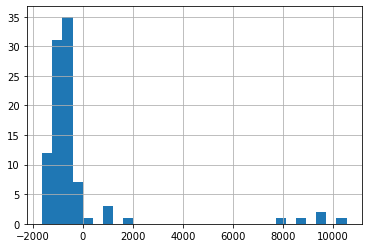

In [33]:
plt.hist(regressor.coef_ - sgd_reg.coef_, bins=30)
plt.grid(True)
plt.show()

In [34]:
print('Intercept CustomSGDRegressor:', int(sgd_reg.intercept_))
print('Intercept SGDRegressor:', int(regressor.intercept_[0]))

Intercept CustomSGDRegressor: 4935
Intercept SGDRegressor: 8848


**Задание 2** (2 балла)

Повысьте качество модели `SGDRegressor` проведя эксперименты со стратегией обучения, а также с регуляризацией. 

Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

Какая комбинация стратегии обучения и регуляризации оказалась выигрышной?

In [35]:
%%time
regressor.verbose = False
grid = {'max_iter': [1000, 2000, 4000], 
        'eta0':[1e-3, 5e-4, 1e-4], 
        'alpha': [0, 0.01, 0.1]}
kf = KFold(n_splits=5, random_state=42, shuffle=True)

gs_cv = GridSearchCV(estimator=regressor, 
                     param_grid=grid, 
                     cv=kf, 
                     scoring='neg_mean_squared_error',
                     verbose=True)
gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  3.3min finished


CPU times: user 5min 51s, sys: 2.13 s, total: 5min 53s
Wall time: 3min 17s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SGDRegressor(alpha=0, eta0=0.001,
                                    learning_rate='constant', random_state=42,
                                    verbose=False),
             param_grid={'alpha': [0, 0.01, 0.1],
                         'eta0': [0.001, 0.0005, 0.0001],
                         'max_iter': [1000, 2000, 4000]},
             scoring='neg_mean_squared_error', verbose=True)

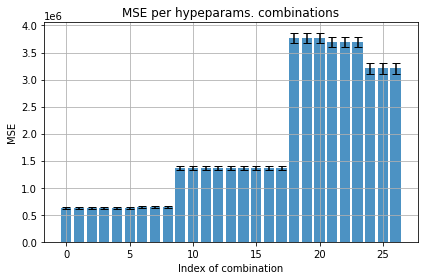

In [36]:
mean_mse_per_folds = -gs_cv.cv_results_['mean_test_score']
std_mse_per_folds = gs_cv.cv_results_['std_test_score']

plt.bar(range(27), mean_mse_per_folds, yerr=std_mse_per_folds, align='center', alpha=0.8, ecolor='black', capsize=4)
plt.ylabel('MSE')
plt.xlabel('Index of combination')
plt.title('MSE per hypeparams. combinations')
# plt.ylim(6_500_000, 7_100_000)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
y_pred_cv = gs_cv.predict(X_test)
print("MSE on test sample:", mean_squared_error(y_test, y_pred_cv))

MSE on test sample: 637915.2917077597


Ранги лучших комбинаций по MSE и соответствующие гиперпараметры

In [40]:
gs_cv.cv_results_['rank_test_score']

array([ 1,  1,  1,  4,  4,  4,  7,  7,  7, 16, 16, 16, 10, 10, 10, 13, 13,
       13, 25, 25, 25, 22, 22, 22, 19, 19, 19], dtype=int32)

In [41]:
ids_best = [i for i, rank in enumerate(gs_cv.cv_results_['rank_test_score']) if rank == 1]
np.array(gs_cv.cv_results_['params'])[ids_best]

array([{'alpha': 0, 'eta0': 0.001, 'max_iter': 1000},
       {'alpha': 0, 'eta0': 0.001, 'max_iter': 2000},
       {'alpha': 0, 'eta0': 0.001, 'max_iter': 4000}], dtype=object)

---

__Выводы:__

* Кросс-валидация и перебор гиперпараметров по сетке позволили убедиться, что выбранные изначально гиперпараметры довольно оптимальны, так при них лучшее качество, но при более тонкой настройке возможно еще улучшить MSE
* MSE на тестовой выборке остался на уровне ~637k
* Наилучшая комбинация гиперпараметров была на первых комбинациях - при отсутствии регуляризации (alpha=0), наибольшем шаге (eta0=0.0001) и не было различий для заданного кол-ва эпох (max_iter=1000/2000/4000)

---

**Задание 3** (3 балла)

Попробуйте обогатить `X` данными из остальных таблиц, так что бы повысить качество модели `SGDRegressor`.

Проведите ряд экспериментов, целью которых будет выявить оптимальный набор данных для решения данной задачи. 

Все эксперименты должны быть подкреплены корректными и понятными графиками.

Опишите вашу стратегию добавления признаков и оценки их значимости, а также ответьте на вопросы:

1. Удалось ли повысить качество предсказания за счёт добавления новых признаков?
2. Есть ли признаки, добавление которых, ухудшило качество модели? Как вы думаете, почему так произошло?

---

Предполагая, что мы не знаем других факторов для команды Radiant на момент 600 секунды, для которых предсказываем кол-ва золота, поэтому будем использовать другие данные вплоть до момента 540 секунд для Radiant. Для Dire, как и раньше, используем все данные.

В игре золото получают за выполнение действий, таких как убийство крипов, героев и др., за это также игрок получает опыт. В силу механики игры, конкретные предметы и выбранные герои влияют на кол-во заметно меньшее влияние. 

Добавим в датасет данные о убийстве крипов (__lh.csv__) и опыте(__xp.csv__).

In [42]:
lasthit = pd.read_csv('../Kaggle/competition-1-sem-1-yandex-shad-fall-2021/lh.csv', index_col=[0, 1])
xp = pd.read_csv('../Kaggle/competition-1-sem-1-yandex-shad-fall-2021/xp.csv', index_col=[0, 1])

lasthit_features = lasthit.unstack().drop([(player, 600) for player in radiant_team], axis=1)
lasthit_features.columns = ['lh_{}_{}'.format(*column) for column in lasthit_features.columns]

xp_features = xp.unstack().drop([(player, 600) for player in radiant_team], axis=1)
xp_features.columns = ['xp_{}_{}'.format(*column) for column in xp_features.columns]

In [43]:
dataset = pd.merge(X, lasthit_features, on='mid', how='inner')
dataset = pd.merge(dataset, xp_features, on='mid', how='inner')

dataset_scaled = scaler.fit_transform(dataset)
dataset_train, dataset_test, y_train, y_test = train_test_split(dataset_scaled, Y, test_size=0.3, random_state=42)

In [44]:
regressor.fit(dataset_train, y_train)
y_pred_dataset = regressor.predict(dataset_test)
print("MSE on test sample:", mean_squared_error(y_test, y_pred_dataset))

MSE on test sample: 622717.253336694


1. Удалось ли повысить качество предсказания за счёт добавления новых признаков?
    * __MSE уменьшилось с 637k до 622k. Новые признаки добавили немного точности предсказания.__

Посмотрим важность признаков: чем больше значение веса признака, тем он значимее. Веса признаков сравнимы друг с другом в силу приведения их к одному масштабу (MinMax).

In [45]:
features_weights = pd.DataFrame(zip(dataset.columns, regressor.coef_), columns=['feature', 'weight'])\
                    .sort_values(by='weight', ascending=False).reset_index(drop=True)
features_weights_best = pd.concat([features_weights.head(20), features_weights.tail(20)]) 

Text(0.5, 1.0, 'Features Weights (Top-10 per high/low)')

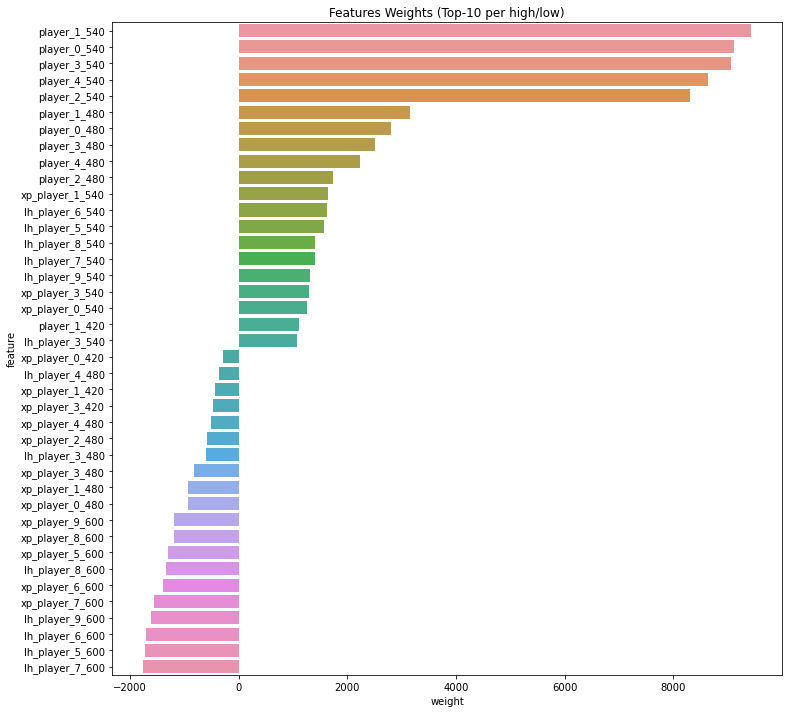

In [46]:
plt.figure(figsize=(12,12))
sns.barplot(x="weight", y="feature", data=features_weights_best)
plt.title('Features Weights (Top-10 per high/low)')

В топе важных фичей, влияющих __положительно__ на кол-во золота в команде Radiant, опыт игроков Radiant, накопленный к последнему моменту накануне 600 секунды (xp_player_1_540, например), также в топе убийство крипов игроками Radiant (lh_player_6_540). Это логично: опыт тесно связан с золотом, а признак для временного ряда с лагом -1 зачастую является сильным предиктором - это ближайшая достоверная информация перед событием таргета.

Топ-1 в важных фичах, влияющих __отрицательно__, убийство крипов игроками Dire на 600 секунде и накопленный опыт. Это тоже логично: чем успешнее одна команда, тем менее успешна противоположная. Если игрок Dire набрал много опыта, то он вероятно убивал героев Radiant, а значит золота у команды Radiant будет меньше.

Попробуем добавить вместо xp/lh другие признаки, которые менее очевидно связаны с таргетом, например, __купленные игроками предметы (items.csv)__. Посчитаем признаки: __сколько каких предметов собрали игроки команды Radiant и Dire__.

In [47]:
items = pd.read_csv('../Kaggle/competition-1-sem-1-yandex-shad-fall-2021/items.csv')

items['team'] = items['player'].apply(lambda x: 'radiant' if x < 5 else 'dire')
items_per_team = items.drop('player', axis=1).groupby(['mid', 'team']).sum().reset_index()

items_pivoted = items_per_team.pivot(index='mid', columns='team', values=[f'item_{x}' for x in range(121)])
items_pivoted.columns = [f'{x[1]}_{x[0]}' for x in items_pivoted.columns]
items_features = items_pivoted.reset_index()

In [48]:
items_features.head(2)

,mid,dire_item_0,radiant_item_0,dire_item_1,radiant_item_1,dire_item_2,radiant_item_2,dire_item_3,radiant_item_3,dire_item_4,...,dire_item_116,radiant_item_116,dire_item_117,radiant_item_117,dire_item_118,radiant_item_118,dire_item_119,radiant_item_119,dire_item_120,radiant_item_120
0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
dataset_items = pd.merge(X, items_features, on='mid', how='inner').drop('mid', axis=1)

dataset_items_scaled = scaler.fit_transform(dataset_items)
dataset_items_train, dataset_items_test, y_train, y_test = \
    train_test_split(dataset_items_scaled, Y, test_size=0.3, random_state=42)

In [50]:
regressor.fit(dataset_items_train, y_train)
y_pred_dataset_items = regressor.predict(dataset_items_test)
print("MSE on test sample:", mean_squared_error(y_test, y_pred_dataset_items))

MSE on test sample: 605913.8765786348


2. Есть ли признаки, добавление которых, ухудшило качество модели? Как вы думаете, почему так произошло 
    * __MSE уменьшилось с 637k до 605k, что даже больше, чем добавление xp/lh! Оказалось, что предметы влияют даже больше, чем опыт или убийство крипов. Однако, предметы покупаются за деньги, поэтому объяснение такому находится быстро.__
    * __Так как данные в целом немного и все они качественно описывают игру, то добавление только очень выборочного и специфичного набора признаков может привести к ухудшению качества. Добавление текущих признаков все еще улучшает прогноз.__

Убедимся, что предметы и правда есть в топе признаков:

In [51]:
features_weights = pd.DataFrame(zip(dataset_items.columns, regressor.coef_), columns=['feature', 'weight'])\
                    .sort_values(by='weight', ascending=False).reset_index(drop=True)
features_weights_best = pd.concat([features_weights.head(10), features_weights.tail(10)]) 

Text(0.5, 1.0, 'Features Weights (Top-5 per high/low)')

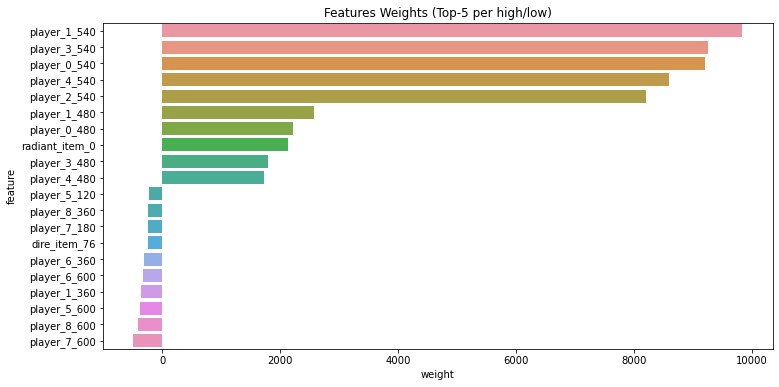

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x="weight", y="feature", data=features_weights_best)
plt.title('Features Weights (Top-5 per high/low)')

## Бинарная классификация

**Задание 4** (3 балла)

Реализуйте класс `CustomSGDClassifier`, который бы обучал логистическую регрессию, используя `SGD`.

Класс, должен принимать следующие параметры при инициализации:
    
    learning_rate : float : параметр задающий скорось обучения
    fit_intercept : bool : если True, то добавляем свободный член
    max_iter : int : максимальное число эпох
    shuffle : bool : если True, то перемещиваем данные обучения перед каждой эпохой
    
и иметь методы `fit`, `predict` и `predict_proba`.

После обучения (запуска метода `fit`) мы должны мочь обратиться к атрибутам класса: 
    
    coef_  : ndarray of shape (n_features,)
    intercept_ : ndarray of shape (1,)

In [53]:
class CustomSGDClassifier(ClassifierMixin):
    def __init__(self, 
                 learning_rate = 0.01,
                 fit_intercept = True, 
                 max_iter = 100, 
                 shuffle = False, 
                 batch_size = 1, 
                 verbose=False,
                 random_state=42):
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.verbose = verbose
        self.random_state = random_state
        
    @staticmethod
    def _add_intercept(X):
        I = np.ones(len(X))[:, np.newaxis]
        X = np.hstack([I, X])
        return X
    
    @staticmethod
    def _sigmoid(X):
        return (1 / (1 + np.exp(-X))) + 0.000001
    
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        self.W = np.random.rand(X.shape[1])
        Y = Y[:, np.newaxis]
        
        losses = []
        epoch = 1
        
        np.random.seed(self.random_state)
        
        while epoch <= self.max_iter:
            dataset = np.hstack([X, Y])
            if self.shuffle:
                shuffle(dataset)
                
            X_epoch = dataset[:, :-1]
            Y_epoch = dataset[:, -1:]
            
            batch_ids = np.random.randint(low=0, high=X.shape[0], size=self.batch_size)
            X_batch = X_epoch[batch_ids]
            Y_batch = Y_epoch[batch_ids]
            
            Y_batch_pred = self._sigmoid(X_batch @ self.W[:, np.newaxis])
            self.W += self.learning_rate * ((Y_batch - Y_batch_pred) * X_batch).sum(axis=0)
            
            loss = log_loss(Y_batch, Y_batch_pred, labels=[0, 1])
            losses.append(loss)

            if self.verbose != False:
                if (epoch % int(self.verbose) == 0):
                    print(f'epoch: {epoch}, log_loss: {loss}')
                
            epoch += 1
        
        self.losses_ = losses
        self.coef_ = self.W[1:]
        self.intercept_ = self.W[0]
    
    
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
            
        return self._sigmoid(X @ self.W[:, np.newaxis]).flatten()
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(np.int32)

Используя `CustomSGDClassifier` научитесь прогнозировать победу команды Radiant.

Оптимальный набор гиперпараметров и признаков отберите, опираясь на такие метрики, как `precision`,  `recall` и `ROC-AUC`.
    
Все эксперименты должны быть подкреплены корректными и понятными графиками.

---

Загрузим таргет и в качестве признаков возьмем все то, что использовали ранее: gold, lh, xp, items.

In [54]:
train = pd.read_csv('../Kaggle/competition-1-sem-1-yandex-shad-fall-2021/train.csv', index_col=[0])
Y = train['radiant_won']

gold_features = pd.read_csv('../Kaggle/competition-1-sem-1-yandex-shad-fall-2021/gold.csv', index_col=[0, 1])
gold_features = gold_features.unstack()
gold_features.columns = ['{}_{}'.format(*column) for column in gold_features.columns]

X = train.reset_index()[['mid']]
X = pd.merge(X, gold_features, on='mid', how='inner')
X = pd.merge(X, lasthit_features, on='mid', how='inner')
X = pd.merge(X, xp_features, on='mid', how='inner')
X = pd.merge(X, items_features, on='mid', how='inner')
X = X.drop('mid', axis=1)

In [55]:
X.head(2)

,player_0_60,player_0_120,player_0_180,player_0_240,player_0_300,player_0_360,player_0_420,player_0_480,player_0_540,player_0_600,...,dire_item_116,radiant_item_116,dire_item_117,radiant_item_117,dire_item_118,radiant_item_118,dire_item_119,radiant_item_119,dire_item_120,radiant_item_120
0,750,957,1161,1571,1721,1871,2022,2850,3303,3454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,285,435,585,736,1334,1667,1818,2016,2328,2477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Отмасштабируем признаки, разделим на трейн/тест, обучим модель и оценим качество.

In [56]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [57]:
%%time
sgd_clf = CustomSGDClassifier(learning_rate=1e-3,
                             fit_intercept=True, 
                             max_iter=1000, 
                             shuffle=True, 
                             batch_size=10, 
                             verbose=100)
sgd_clf.fit(X_train, y_train)

epoch: 100, log_loss: 10.361872797702265
epoch: 200, log_loss: 24.177703194638617
epoch: 300, log_loss: 2.4332280602016434
epoch: 400, log_loss: 1.2534975687170908
epoch: 500, log_loss: 0.6385305787090786
epoch: 600, log_loss: 0.8218922724990216
epoch: 700, log_loss: 0.5330731649742214
epoch: 800, log_loss: 0.6055768048630681
epoch: 900, log_loss: 0.8484363426249775
epoch: 1000, log_loss: 0.7821265885275548
CPU times: user 30.6 s, sys: 11.8 s, total: 42.3 s
Wall time: 42.4 s


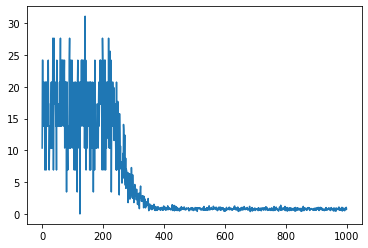

In [58]:
plt.plot(sgd_clf.losses_)

In [59]:
y_pred = sgd_clf.predict(X_test)
y_pred_proba = sgd_clf.predict(X_test)
print("Precision on test sample:", precision_score(y_test, y_pred))
print("Recall on test sample:", recall_score(y_test, y_pred))
print("ROC AUC on test sample:", roc_auc_score(y_test, y_pred_proba))

Precision on test sample: 0.5400100654252642
Recall on test sample: 0.5480081716036772
ROC AUC on test sample: 0.518482699164992


Аналогично задаче регрессии, подберем оптимальные гиперпараметры с помощью кросс-валидации

In [60]:
%%time
classifier = SGDClassifier()

grid = {'max_iter': [500, 1000, 2000], 
        'eta0':[1e-2, 1e-3, 1e-4], 
        'alpha': [0.01, 0.05, 0.1]}
kf = KFold(n_splits=5, random_state=42, shuffle=True)

gs_cv_clf = GridSearchCV(estimator=classifier, 
                         param_grid=grid, 
                         cv=kf, 
                         scoring='roc_auc',
                         verbose=True)
gs_cv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   37.7s finished


CPU times: user 3min 39s, sys: 3.73 s, total: 3min 42s
Wall time: 38.1 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SGDClassifier(),
             param_grid={'alpha': [0.01, 0.05, 0.1],
                         'eta0': [0.01, 0.001, 0.0001],
                         'max_iter': [500, 1000, 2000]},
             scoring='roc_auc', verbose=True)

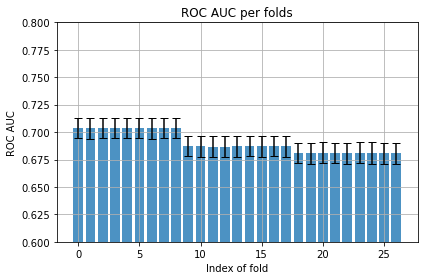

In [61]:
mean_rocauc_per_folds = gs_cv_clf.cv_results_['mean_test_score']
std_rocauc_per_folds = gs_cv_clf.cv_results_['std_test_score']

plt.bar(range(27), mean_rocauc_per_folds, yerr=std_rocauc_per_folds, align='center', 
        alpha=0.8, ecolor='black', capsize=4)
plt.ylabel('ROC AUC')
plt.xlabel('Index of fold')
plt.title('ROC AUC per folds')
plt.ylim(0.6, 0.8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
y_pred_cv = gs_cv_clf.predict(X_test)
y_pred_proba_cv = gs_cv_clf.predict(X_test)
print("Precision on test sample:", precision_score(y_test, y_pred_cv))
print("Recall on test sample:", recall_score(y_test, y_pred_cv))
print("ROC AUC on test sample:", roc_auc_score(y_test, y_pred_proba_cv))

Precision on test sample: 0.6994328922495274
Recall on test sample: 0.5669050051072523
ROC AUC on test sample: 0.6501005316282698


Ранги лучших комбинаций по ROC AUC и соответствующие гиперпараметры

In [63]:
gs_cv_clf.cv_results_['rank_test_score']

array([ 3,  9,  5,  4,  2,  1,  7,  8,  6, 11, 15, 18, 17, 12, 10, 14, 16,
       13, 22, 27, 20, 24, 25, 19, 21, 23, 26], dtype=int32)

In [64]:
ids_best = [i for i, rank in enumerate(gs_cv_clf.cv_results_['rank_test_score']) if rank == 1]
np.array(gs_cv_clf.cv_results_['params'])[ids_best]

array([{'alpha': 0.01, 'eta0': 0.001, 'max_iter': 2000}], dtype=object)

---

__Выводы:__

* Кросс-валидация и перебор гиперпараметров по сетке позволил найти более оптимальные параметры
* Все основные метрики на тестовой выборке заметно улучшились:
    * precision: 0.54 -> 0.70
    * recall: 0.55 -> 0.57
    * roc auc: 0.52 -> 0.65
* Наилучшая комбинация гиперпараметров была на фолде с минимальной регуляризацией (alpha=0.01), среднем шаге (eta0=0.001) и наибольшем кол-ве эпох (max_iter=2000)

---

**Задание 5** (2 балла)

Попробуйте повысить качество предсказания, используя:

 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
 
Проведите эксперементы по подбору гиперпараметров. Какой алгоритм показал наилучшее качество?

Попробуем модели с базовыми гиперпараметрами. Некоторые модели долго обучаются на большом кол-ве итераций, поэтому ограничим кол-во итераций.

In [65]:
logit = LogisticRegression(max_iter=500)
svc = SVC(max_iter=1000)
mlpc = MLPClassifier(max_iter=100)

In [66]:
%%time
for model in [logit, svc, mlpc]:
    print(model.__class__)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict(X_test)
    print("Precision on test sample:", precision_score(y_test, y_pred))
    print("Recall on test sample:", recall_score(y_test, y_pred))
    print("ROC AUC on test sample:", roc_auc_score(y_test, y_pred_proba))
    print("-"*20)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Precision on test sample: 0.6680080482897385
Recall on test sample: 0.6782431052093973
ROC AUC on test sample: 0.6546093915759036
--------------------
<class 'sklearn.svm._classes.SVC'>
Precision on test sample: 0.5579944049924682
Recall on test sample: 0.6621552604698672
ROC AUC on test sample: 0.5439655251189146
--------------------
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Precision on test sample: 0.6386228319958581
Recall on test sample: 0.6299795709908069
ROC AUC on test sample: 0.6198541970134354
--------------------
CPU times: user 2min 55s, sys: 2 s, total: 2min 57s
Wall time: 1min


Лучшие результаты по ROC AUC показала LogisticRegression, подберем более оптимальные параметры для этой модели:

In [67]:
%%time
grid = {'C': [0.5, 1.0, 2.0],
        'l1_ratio': [0.2, 0.5, 0.8],
        'max_iter': [200, 500, 1000]}
kf = KFold(n_splits=5, random_state=42, shuffle=True)

gs_cv_logit = GridSearchCV(estimator=logit, 
                             param_grid=grid, 
                             cv=kf, 
                             scoring='roc_auc',
                             verbose=True)
gs_cv_logit.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  5.0min finished


CPU times: user 39min 28s, sys: 31.3 s, total: 39min 59s
Wall time: 5min 4s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.5, 1.0, 2.0], 'l1_ratio': [0.2, 0.5, 0.8],
                         'max_iter': [200, 500, 1000]},
             scoring='roc_auc', verbose=True)

In [68]:
y_pred_logit = gs_cv_logit.predict(X_test)
y_pred_proba_logit = gs_cv_logit.predict(X_test)
print("Precision on test sample:", precision_score(y_test, y_pred_logit))
print("Recall on test sample:", recall_score(y_test, y_pred_logit))
print("ROC AUC on test sample:", roc_auc_score(y_test, y_pred_proba_logit))

Precision on test sample: 0.6679197994987469
Recall on test sample: 0.6805413687436159
ROC AUC on test sample: 0.6550596136421463


Получили, что настроенная модель LogisticRegression чуть лучше настроенного SGDClassifier из предыдущего пункта в терминах ROC AUC, при этом precision уменьшился, а recall вырос:
* precision: 0.70 -> 0.67
* recall: 0.57 -> 0.68
* roc auc: 0.650 -> 0.655

Может ли масштабирование повлиять на работу этих алгоритмов?

__Да, это может влиять на скорость сходимости, сравнимость и интерпретируемость весов модели, а также корректность работы некоторых алгоритмов, например Support Vector Machine, для него крайне рекомендуется масштабировать признаки.__

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 6** (2 балла)

Для каждого типа классификатора, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

---

Среди классификаторов в двух предыдущих пунктах лучшими были настроенный SGDClassifier и LogisticRegression. Использую данные кроссвалидации этих моделей, сравним их:

In [69]:
comparison = pd.DataFrame({'SGDClassifier': gs_cv_clf.cv_results_['mean_test_score'],
                           'LogisticRegression': gs_cv_logit.cv_results_['mean_test_score']})

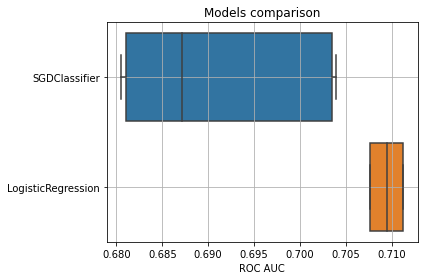

In [70]:
sns.boxplot(data=comparison, orient="h")
plt.xlabel('ROC AUC')
plt.title('Models comparison')
plt.grid(True)
plt.tight_layout()
plt.show()

__Выводы:__

* При сравнение двух данных классификаторов (стохастического и обычного) по boxplot с заметной разницей лидирует LogisticRegression
* Классификаторы обучаются на трейн выборке, используя все признаки, что есть в датасете, и пытаются уменьшить ошибку предсказания целевой переменной (y_train) на всем датасете, либо на его части (SGD), обновляя вектор весом модели в соответствии с формулой градиентного спуска
* Полезно масштабировать признаки для улучшения работы модели (скорость сходимости, не переполнение лосса), а для некоторых алгоритмов это критически важно (SVC, а также, например, пространственные kNN, k-means)
* Наиболее чувствительными являются параметры шаг обучения и кол-во итераций, ими можно заметно влиять на сходимость спуска и конечное качество, настройка одних этих параметров позволяет достичь хорошего качества
* Параметр fit_intercept отвечает за наличие свободного члена в многочлене регрессии
* Есть параметры регуляризации, которые штрафуют веса модели за большие значения, контролируя переобучение
* Параметр shuffle перемешивает выборку на каждом шаге и чуть "поворачивает" вектор антиградиента в пространстве, что в целом положительно сказывается на сходимости (не по одному "склону" функции делаем спуск, а с разных сторон)
* Для SGD можем указать размер батча - размер выборки по которой минимизируем ошибку на каждом шаге, чем меньше, тем более "стохастичен" спуск, влияет на стабильность сходимости
* Есть технические параметры: n_jobs, который может укорить обучение, распараллелив процесс
* Есть l1_ratio, который позволяет "балансировать" между L1/L2 регуляризациями, делая ElasticNet регуляризацию, если 0 < l1_ratio < 1